# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>

## Сбор данных из открытых источников

В этом занятии мы обсудим, что можно сделать, если у вас на руках нет готовых данных, которые нужно анализировать. Один из способов набрать себе данных &mdash; взять из интернета. Человек часто находит информацию в сети и анализирует её, так почему же не заставить компьютер сделать то же самое?

Поиск данных в сайтах называют скрапингом от английского слова *scrape* (наскребать). Программа-скрапер может обходить веб-страницы и собирать нужную себе информацию. Если скачанную информацию требуется обрабатывать впоследствии, то сбор делится на 2 этапа: 

* **скрапинг** — скачивание информации,
* **парсинг** — приведение скачанных данных к удобному структурированному виду.

Многие компании пользуются таким сбором информации. Зачастую этот процесс связан с обработкой персональных данных, поэтому в последнее время ведутся разговоры о государственном регулировании скрапинга, о чём, например, написано на <a target="_blank" href="https://habr.com/ru/post/545818/?">Хабре</a>. Если вкратце, то надо быть осторожными при использовании парсинга.

1.   Не стоит перегружать сервера — если они сгорят, это может быть расценено, как ущерб имуществу.
2.   Не нужно взламывать защитные системы — за неправомерный доступ существует ответственность.
3.   Следите за тем, что вы не подписали пользовательское соглашение, в котором запрещён скрапинг.
4.   Учитывайте законы об интеллектуальной собственности.
5.   Не собирайте персональные данные людей без их согласия даже из открытого доступа.



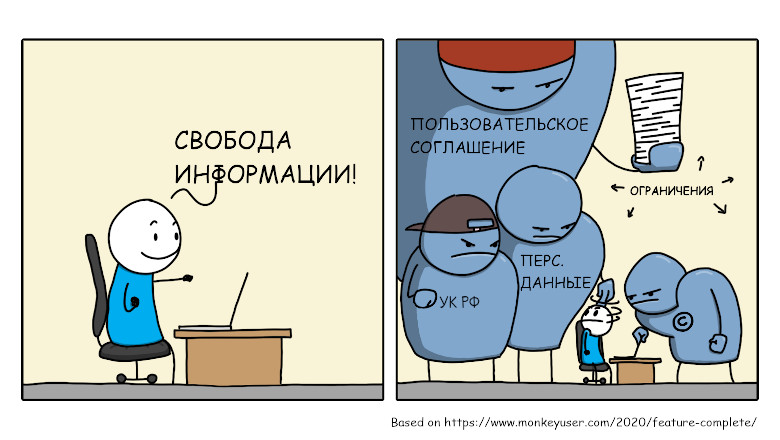

## 1. Сбор с использованием API

Создатели некоторых сервисов понимают, что находящаяся на их сайтах информация может быть полезна для аналитики. Тогда они предоставляют специальный набор ссылок (**урлов**), на которые можно отправлять HTTP-запросы. Тогда вместо получения html-страницы, как в браузере, сайт будет отдавать сразу структурированные данные, например, в формате JSON. Совокупность форматов таких запросов образует API (Application Program Interface).

В таком случае сайт может отдавать только те данные, которыми хочет делиться, следить за количеством обращений к этим данным, а для аналитика такой вариант лучше, поскольку позволяет быстрее парсить результат.

Сегодня же мы разберём, как работать с <a target="_blank" href="https://kinopoisk.dev/">API Кинопоиска</a>. Мы попробуем скачать информацию о фильмах.

In [1]:
import json
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3, palette="Set2", style="whitegrid")

Чтобы иметь возможность обращаться к API, пользователю требуется авторизация. Для этого необходимо зарегистрироваться на сайте API. В разделе <a target="_blank" href="https://kinopoisk.dev/docs">документация</a>, где описан формат ссылок для получения информации, вы увидите ваш токен. Это специальный ключ-строка, который позволяет системе идентифицировать вас и, например, считать количество ваших запросов, которое тарифицируется.

Ваш токен &mdash; ваша личная информация. Лучше не показывать её другим людям, иначе они смогут задавать запросы от вашего имени. Поэтому предпочтительнее сохранить его в какой-то файл и читать оттуда при необходимости.

In [2]:
# Считываем токен авторизации
with open('token.txt') as token_file:
    token = token_file.read()

Скачаем информацию про фильм "Джентльмены". Для этого найдём его в поиске на сайте <a target="_blank" href="https://www.kinopoisk.ru/">Кинопоиска</a>. Откроем страницу с фильмом. Она имеет вид `https://www.kinopoisk.ru/film/1143242/`. Здесь `1143242` &mdash; это ID фильма, который требуется для запроса в API.

Путь, на который нужно подать запрос, формируется таким образом:

`https://api.kinopoisk.cloud/movies/{FILM_ID}/token/{TOKEN}`.

Подробные указания можно посмотреть в документации.

Чтобы отправить запрос, будем использовать библиотеку `requests`. Так как мы получаем информацию, требуется функция `get`. Она принимает ссылку, а также дополнительные параметры, после чего отправляет запрос.

In [4]:
film_id = "1143242"

# Формируем путь для задания запроса
url = "https://cloud-api.kinopoisk.dev/movies/{}/token/{}".format(
    film_id,
    token
)

# Отправляем запрос о фильме
req = requests.get(url, params={})
# Получаем информацию в виде JSON
film_info = req.json()

Результат запроса также содержит в себе код ответа, который отправил сервер. В случае успеха возвращается код `200`. Другие распространённые коды, которые сообщают об ошибках:

* `404` &mdash; путь не найден,
* `403` &mdash; нет доступа,
* `400` &mdash; неверный формат запроса.

In [5]:
req

<Response [200]>

Выведем информацию о фильме. Видим, что доступны id фильма, актёрский состав, возрастное ограничение, год выпуска и другая информация.

In [6]:
film_info

{'id': 293724,
 'id_kinopoisk': 1143242,
 'url': '412965-dzhentlmeny-2019',
 'type': 'movie',
 'title': 'Джентльмены',
 'title_alternative': 'The Gentlemen',
 'tagline': '«Criminal. Class»',
 'description': 'Талантливый выпускник Оксфорда, применив свой уникальный ум\xa0и невиданную дерзость, придумал нелегальную схему обогащения с\xa0использованием поместья обедневшей английской аристократии. Однако когда он\xa0решает продать свой бизнес влиятельному клану миллиардеров из\xa0США, на\xa0его пути встают не\xa0менее обаятельные, но\xa0жесткие джентльмены. Намечается обмен любезностями, который точно не\xa0обойдется без\xa0перестрелок и\xa0парочки несчастных случаев.',
 'year': 2019,
 'poster': '//images.kinopoisk.dev/posters/1143242.jpg',
 'trailer': 'https://www.youtube.com/embed/dABPCMxu074',
 'age': 'зрителям, достигшим 18 лет',
 'actors': ['Мэттью МакКонахи',
  'Чарли Ханнэм',
  'Генри Голдинг',
  'Хью Грант',
  'Мишель Докери',
  'Джереми Стронг',
  'Эдди Марсан',
  'Джейсон Вонг',


Давайте теперь соберём информацию о наборе фильмов в `pandas.DataFrame`. Количество фильмов, которые можно скачать за день, ограничего на бесплатном тарифе 50 запросами, поэтому скачаем сколько получится. Скачивание набора фильмов производится постранично. Одна страница содержит 10 фильмов, её можно скачать одним запросом. Его формат, а также формат ответа, описан в документации.

In [7]:
# Загрузим фильмы, скачанные до этого
with open('all_films.json') as films_file:
    all_films = json.load(films_file)

In [9]:
# Зададим список страниц, которые скачиваем
pages = list(range(220, 225))

for page_num in pages:
    # Формируем ссылку для скачивания страницы
    url = "https://cloud-api.kinopoisk.dev/movies/all/page/{}/token/{}".format(
        page_num,
        token
    )

    # Достаём информацию по ссылке
    req = requests.get(url, params={})
    req_result = req.json()
    # Добавляем результат в список фильмов
    all_films += req_result['movies']

Преобразуем всё в `DataFrame`. Сохраним id, название, описание, актёров, возрастное ограничение и звуковые дорожки.

In [13]:
df = pd.DataFrame(all_films, columns=['id', 'id_kinopoisk', 'title', 'actors', 'age',
                                      'description', 'collapse', 'countries'])
df['sounds'] = df['collapse'].apply(lambda x: x["voice"])
df = df.drop('collapse', axis=1)

In [14]:
df.sample(5)

,id,id_kinopoisk,title,actors,age,description,countries,sounds
63,20242,404,Квартира,"[Джек Леммон, Ширли Маклейн, Фред МакМюррэй, Р...","зрителям, достигшим 16 лет","Скромный служащий страховой компании Бакстер, ...",[США],None
96,566487,467962,Печальная история любви,"[Квон Сан-у, Ли Бо-ён, Ли Бом-су, Чжон-хак Чхв...",None,"Кей и Крим знакомы еще со школьной скамьи, жив...",[Корея Южная],None
47,539584,376,Однажды на Диком Западе,"[Чарльз Бронсон, Клаудия Кардинале, Генри Фонд...","зрителям, достигшим 16 лет",Молодая вдова отказывается продать ферму дельц...,"[Италия, США]",None
104,526190,7687,Полуночный экспресс,"[Брэд Дэвис, Джон Хёрт, Рэнди Куэйд, Бо Хопкин...","зрителям, достигшим 18 лет",Американского студента Билли Хейса ловят при п...,"[Великобритания, США]",None
14,565381,262888,"Внимание, ТРЭШ! История трэш металла","[Death Angel, Том Энджелриппер, Фил Ансельмо, ...",None,"Картина повествует об эволюции, влиянии на кул...",[США],None


Сравним возрастные ограничения в зарубежных и отечественных фильмах. Напишем функции, которые по известным колонкам из таблицы вернут минимальный возраст и то, является ли фильм отечественным.

In [15]:
def min_age(age_str):
    '''Вычисляет минимальный возраст для просмотра'''
    
    if age_str is None:
        return -1
    age_words = age_str.split()
    
    for word in age_words:
        # Смотрим, является ли слово числом
        # Если да, это и есть возрастное ограничение
        if word.isnumeric():
            return int(word)
        
    return 0

In [16]:
def is_russian(countries):
    '''Вычисляет, является ли фильм отечественным'''
    return 'Россия' in countries or 'СССР' in countries

Применим эти функции, так в таблице появятся интересующие нас признаки фильмов

In [17]:
df['min_age'] = df.age.apply(min_age)
df['is_russian'] = df.countries.apply(is_russian)

In [20]:
df.sample(5)

,id,id_kinopoisk,title,actors,age,description,countries,sounds,min_age,is_russian
130,527265,39667,Братья-соперники,"[Санджай Датт, Салман Кхан, Каришма Капур, Дал...","зрителям, достигшим 12 лет",Два брата в семействе Обероев совсем не похожи...,[Индия],None,12,False
85,251761,494615,Горе от ума,"[Игорь Охлупин, Ольга Кузина, Полина Агуреева,...",для любой зрительской аудитории,Театральная постановка по одноимённой пьесе А....,[Россия],None,0,True
41,16432,535,8 с половиной,"[Марчелло Мастроянни, Клаудия Кардинале, Анук ...","зрителям, достигшим 12 лет",Фильм  парафраз виртуозности и поэтичности тв...,"[Италия, Франция]",None,12,False
23,279965,1115382,За пределом,"[Маргарита Мамун, Ирина Винер, Амина Зарипова]",None,Портрет прославленной российской художественно...,"[Польша, Германия, Финляндия, Франция]",None,-1,False
52,43066,42905,Пацаны,"[Валерий Приёмыхов, Ольга Машная, Андрей Зыков...","зрителям, достигшим 12 лет","Хотя бы один взрослый, которого можно называть...",[СССР],None,12,True


Построим гистограмму для всех фильмов сразу. Используем специальную функцию `sns.countplot`, которая строит график встречаемости категориальных значений.

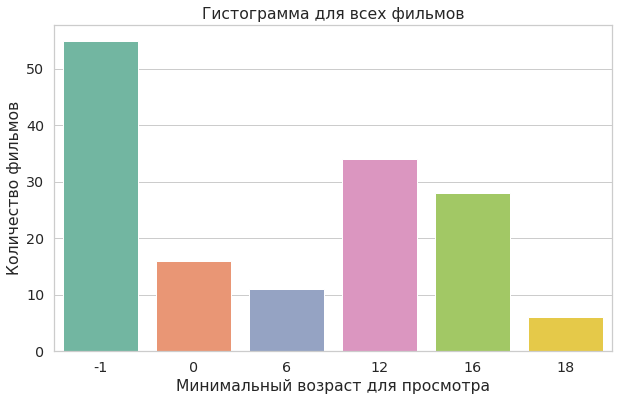

In [21]:
plt.figure(figsize=(10, 6))
plt.title('Гистограмма для всех фильмов')
sns.countplot(data=df, x='min_age')
plt.xlabel('Минимальный возраст для просмотра')
plt.ylabel('Количество фильмов')
plt.show()

Теперь сделаем 2 графика, на которых разделим отечественные и иностранные фильмы. Для корректного сравнения лучше убрать из рассмотрения фильмы, для которых возраст определить не получилось.

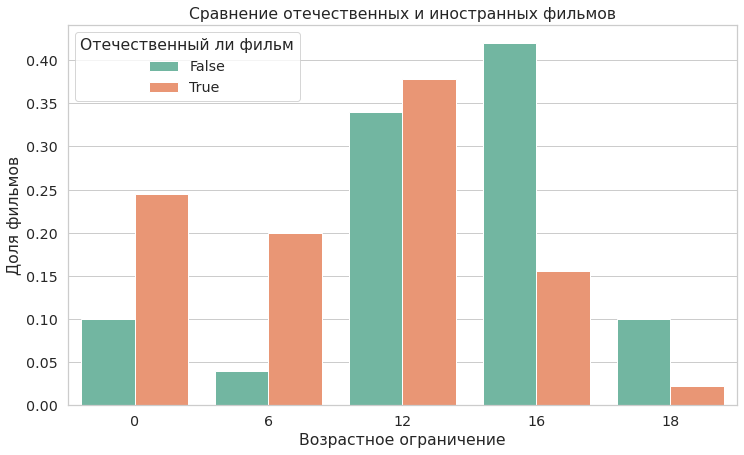

In [26]:
df_known_age = df[df.min_age != -1]
# Группируем данные и достаём долю фильмов
frac = df_known_age.groupby(by="is_russian").min_age.value_counts(normalize=True)
frac = frac.rename('fraction')

plt.figure(figsize=(12, 7))
sns.barplot(
    data=frac.reset_index(),  # Разгруппировываем таблицу
    x="min_age",
    y="fraction", 
    hue="is_russian",
)
plt.title("Сравнение отечественных и иностранных фильмов")
plt.xlabel("Возрастное ограничение")
plt.ylabel("Доля фильмов")
plt.legend(title="Отечественный ли фильм");
plt.show()

Отсюда можно заметить, что иностранным фильмам рейтинг 6+ почти не ставится, при этом им гораздо чаще, чем отечественным фильмам, ставится рейтинг 16+.

Обратите внимание, что в данном случае гистограмма отображает не количество фильмов, а их долю. Только так можно аккуратно визуально сравнить распределение рейтинга.

Теперь выделим из таблицы фильмы про школу. Давайте предположим, что фильмы про школу — это те фильмы, в которых есть слова, связанные с учёбой. Чтобы искать такие слова, составим список префиксов слов про школу.

In [29]:
SCHOOL_PREFIXES = [
    'школ',
    'учени'
    'класс',
    'урок',
    'учите',
    'математи',
    'студент',
    'студенч'
]

Напишем функцию, которая будет проверять наличие фильмов с данными префиксами.

In [30]:
def is_about_school(description):
    '''Вычисляет по описанию, является ли фильм фильмом про школу'''
    
    if description is None:
        return False
    descr_words = description.split()
    
    # Приводим слова к нижнему регистру
    descr_words = [w.lower() for w in descr_words]
    
    for word in descr_words:
        for prefix in SCHOOL_PREFIXES:
            if word.startswith(prefix):
                return True
            
    return False

Применим эту функцию, построив новый столбец `is_school`.

In [31]:
df['is_school'] = df.description.apply(is_about_school)

Посмотрим, какие фильмы оказались фильмами про школу.

In [32]:
df[df.is_school == True]

,id,id_kinopoisk,title,actors,age,description,countries,sounds,min_age,is_russian,is_school
0,36124,42070,Разные судьбы,"[Татьяна Пилецкая, Юлиан Панич, Георгий Юматов...","зрителям, достигшим 12 лет","Молодые ленинградцы, вчерашние школьники, всту...",[СССР],None,12,True,True
8,518410,471407,Математик и черт,"[Всеволод Шестаков, Александр Кайдановский, Ал...",None,Математик предлагает продать душу дьяволу за т...,[СССР],None,-1,True,True
26,38551,45028,Курьер,"[Федор Дунаевский, Анастасия Немоляева, Олег Б...","зрителям, достигшим 16 лет","Выпускник школы Иван, дожидаясь призыва в арми...",[СССР],None,16,True,True
30,563594,402568,Сломанное королевство,"[Рэйчел Ли Кук, Дэниэл Гиллис, Кэндис МакКлюр,...",None,Здесь несколько историй. 14-летняя проститутка...,[США],None,-1,False,True
34,66127,95049,Мост искусств,"[Адриен Мишо, Наташа Ренье, Алексис Лоре, Дени...",None,"Париж, 1979  1980. Сара  певица в квартете, ...",[Франция],None,-1,False,True
44,530545,45244,Завтра была война,"[Сергей Никоненко, Нина Русланова, Вера Аленто...","зрителям, достигшим 12 лет",Начало сороковых. Герои фильма  обычные совет...,[СССР],None,12,True,True
81,528991,44577,Городской романс,"[Мария Соломина, Евгений Киндинов, Геннадий Са...","зрителям, достигшим 12 лет",Маша и Женя встретились в огромном городе и по...,[СССР],None,12,True,True
82,484425,595990,Святая дочь Бога,"[Чийян Викрам, Анушка Шетти, Амала Пол, Нассер...","зрителям, достигшим 16 лет",Кришна  взрослый мужчина с умственным развити...,[Индия],None,16,False,True
86,46862,58778,Кес,"[Дэвид Брэдли, Фредди Флетчер, Линн Перри, Кол...",None,"История 12-летнего тинэйджера Билли Каспера, у...",[Великобритания],None,-1,False,True
87,17829,11190,Сабрина,"[Хамфри Богарт, Одри Хепберн, Уильям Холден, У...","зрителям, достигшим 12 лет",В роскошной усадьбе на западном берегу Лонг-Ай...,[США],None,12,False,True


## 2. Парсинг HTML напрямую

Не всегда бывает так, что информация предоставляется в удобном виде. Тогда приходится парсить сырую HTML-страницу. Но в `Python` есть различные библиотеки, которые помогают упростить процесс парсинга, одна из них &mdash; <a target="_blank" href="https://beautiful-soup-4.readthedocs.io/en/latest/">`BeautifulSoup`</a>. Попробуем с её помощью начать обход страниц сайта <a target="_blank" href="simple.wikipedia.org">simple.wikipedia.org</a>. 

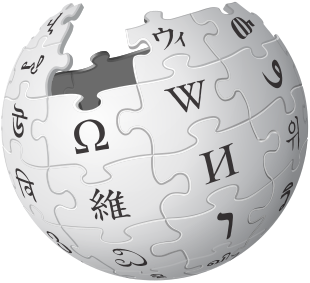

Базовый функционал библиотеки `BeautifulSoup` позволяет нам:

* cоздавать парсер HTML-страницы (принимает строку с документом),
* искать текст на странице (`parser.get_text`),
* искать элементы по тегу (`parser.find`, `parser.findAll`),
* извлекать параметры из элемента (`element.get`).

In [38]:
# !python3 -mpip install url_normalize
# !python3 -mpip install bs4

In [39]:
from urllib.parse import urlparse, urldefrag, urljoin
from urllib.request import urlopen
from url_normalize import url_normalize
from bs4 import BeautifulSoup
from queue import Queue
import time

Определим вспомогательные функции, которые будут скачивать страницу с интернета и искать в ней информацию.

In [ ]:
SEED = "https://simple.wikipedia.org/wiki/Data_science"

def download_from_the_internet(url):
    '''Скачивает сраницу с интернета

    Параметры:
        url (str) - ссылка на страницу для скачивания

    Возвращает:
        str - html-страница в виде строки, None в случае неудачи
    '''
    try:
        return urlopen(url).read().decode('utf-8')
    except KeyboardInterrupt:
        raise
    except:
        return None

    
def extract_links_from_html(url, html):
    '''Парсит ссылки на странице

    Принимает:
        url (str) - исходный урл страницы
        html (str) - содержание html-страницы

    Возвращает:
        list - список ссылок, находящихся на странице
    '''
    parser = BeautifulSoup(html)
    # Формируем ссылки на те страницы, на которые ссылается документ
    return [urljoin(url, link.get('href')) for link in parser.findAll('a')]


def extract_text_info_from_html(html):
    '''Парсит текстовую информацию на странице

    Принимает:
         html (str) - содержание html-страницы

    Возвращает:
        dict - текстовая часть страницы по ключу text,
               название по ключу title
    '''
    soup = BeautifulSoup(html, features="html.parser")
    for script in soup(["script", "style"]):
        script.extract()
    
    # Объединяем строки текста
    text = soup.get_text()
    lines = (line.strip() for line in text.splitlines())
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    text = '\n'.join(chunk for chunk in chunks if chunk)

    # Находим название на странице
    title = soup.find('title').string
    
    return {'text': text, 'title': title}
    

def is_wiki_article(url):
    '''Проверяет, является ли ссылка страницей на simple.wikipedia'''
    if 'simple.wikipedia' not in url:
        return False
    
    prohibited = ['Category', 'Special', 'Wikipedia',
                  'php', 'Help']
    
    # Проверяем, есть ли запрещённые строки в ссылке
    for token in prohibited:
        if token in url:
            return False
        
    return True

Объявляем список страниц Википедии.

In [ ]:
wiki_df_json = []

Далее напишем обход в ширину графа, построенного на страницах Википедии. Ребро в этом графе означает, что одна страница ссылается на другую. Тогда для того, чтобы получить список соседей страницы, нужно вызвать функцию `extract_links_from_html` и отфильтровать оттуда статьи Википедии. Однако перед тем, как работать со ссылкой, нам нужно привести её к стандартному виду &mdash; нормализовать.

In [ ]:
# Максимальное число загруженных страниц
MAX_DOWNLOADS = 10
# Создаём очередь для обхода в ширину
q = Queue()
q.put(SEED)

already_visited = set()
n_downloads = 0
time_start = time.time()

while not q.empty():
    # Нормализуем урл
    main_url = url_normalize(q.get())
    if main_url in already_visited:
        continue
    already_visited.add(main_url)
    html = download_from_the_internet(main_url)
    
    # Извлекаем ссылки из страницы
    children_links = extract_links_from_html(main_url, html)
    time.sleep(0.5)
    
    # Извлекаем текст страницы
    text_info = extract_text_info_from_html(html) 
    
    # Добавляем запись в таблицу
    text_info['url'] = main_url
    wiki_df_json.append(text_info)
    
    n_downloads += 1
    if n_downloads > MAX_DOWNLOADS:
        break
    
    # Добавляем ещё не посещённые ссылки в очередь
    for child in children_links:
        if url_normalize(child) not in already_visited and is_wiki_article(child):
            q.put(child)

Создадим из данных `DataFrame` и выберем оттуда 5 случайных записей.

In [ ]:
wiki_df = pd.DataFrame(wiki_df_json)

In [ ]:
wiki_df.sample(5)

,text,title,url
9,"Data - Simple English Wikipedia, the free ency...","Data - Simple English Wikipedia, the free ency...",https://simple.wikipedia.org/wiki/Data
7,"English language - Simple English Wikipedia, t...","English language - Simple English Wikipedia, t...",https://simple.wikipedia.org/wiki/English_lang...
11,"Mathematics - Simple English Wikipedia, the fr...","Mathematics - Simple English Wikipedia, the fr...",https://simple.wikipedia.org/wiki/Mathematics
0,"Data science - Simple English Wikipedia, the f...","Data science - Simple English Wikipedia, the f...",https://simple.wikipedia.org/wiki/Data_science
3,"English language - Simple English Wikipedia, t...","English language - Simple English Wikipedia, t...",https://simple.wikipedia.org/wiki/English_lang...


В данном случае, кроме ссылки, названия и самого текста, про страницу ничего не известно. Для работы с такими данными можно применять продвинутые методы анализа текстов, про которые рассказывается в последующих курсах.